In [1]:
# standard libraries
import numpy as np #numpy warnings may be safely ignored, known issue.
import pandas as pd
from collections import defaultdict
import datetime as dt 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nr_dict = defaultdict()
for x in [2010 + x for x in range(8)] :
    nr_dict[x] = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/" \
                             +str(x)+"/NiceRide_trip_history_"+str(x)+".csv")
nr_year = pd.concat(nr_dict)

In [38]:
# Changing dates into datetimes
# format should be '2010-06-10 08:01:00'
nr_year['Start_date'] = nr_year['Start_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
nr_year['End_date'] = nr_year['End_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    
# Time intensive, consider changing to work with values/numpy instead
# Currently not working appropriately

In [39]:
nr_year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2682001 entries, (2010, 0) to (2017, 459902)
Data columns (total 8 columns):
Start_date    datetime64[ns]
Start_name    object
Start_id      int64
End_date      datetime64[ns]
End_name      object
End_id        int64
duration      int64
account       object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 180.2+ MB


### Function calls

In [47]:
def df_sum_formed(nr, percentiles=None):
    '''
    Takes a hierarchal dataframe by year, with a column 'duration' containing numeric ride lengths
    Percentiles can be formated by passing a float, or an array of floats. Default is .25, .5, .75 set as None
    
    Returns a summary dataframe (describe method) with values as formatted objects
    '''
    # Unit testing should be added to check dtypes
    tmp = pd.DataFrame(columns = ["201" + str(x) for x in range(8)])
    
    for x in [2010 + x for x in range(8)] :
        tmp[str(x)] = nr.loc[x].duration.describe(percentiles=percentiles).map('{:,.2f}'.format)
    
    return tmp

In [48]:
def df_sum(nr, percentiles=None):
    '''
    Takes a hierarchal dataframe by year, with a column 'duration' containing numeric ride lengths
    Percentiles can be formated by passing a float, or an array of floats. Default is .25, .5, .75 set as None
    
    Returns a summary dataframe (describe method) with values as ints
    '''
    # Unit testing should be added to check dtypes
    tmp = pd.DataFrame(columns = ["201" + str(x) for x in range(8)])
    
    for x in [2010 + x for x in range(8)] :
        tmp[str(x)] = nr.loc[x].duration.describe(percentiles=percentiles)
    
    return tmp

In [57]:
def mcsm_graph(summary) :
    '''
    Takes a summary dataframe and produces visualizations from it
    Will produce a graph of the summaries: Mean, Count, Std. Dev., and Max
    '''
    plt.figure(figsize=[10,10])
    plt.subplot(2,2,1)
    summary.loc['mean'].plot(kind='bar', title='Ride Mean')
    plt.subplot(2,2,2)
    summary.loc['count'].plot(kind='bar', title='Total rides')
    plt.subplot(2,2,3)
    summary.loc['std'].plot(kind='bar', title='Ride length std')
    plt.subplot(2,2,4)
    summary.loc['max'].plot(kind='bar', title='Ride max length')
    plt.tight_layout()
    plt.show()

## Outlier identification, reasoning, and removal

In [49]:
df_sum_formed(nr_year, percentiles=[.25, .5, .75,.999])

,2010,2011,2012,2013,2014,2015,2016,2017
count,"99,037.00","216,405.00","273,392.00","307,429.00","411,705.00","482,872.00","431,690.00","459,471.00"
mean,"1,620.67","1,155.51","1,193.38","1,239.53","1,488.76","1,479.75","1,385.29","1,516.14"
std,"4,814.70","3,204.77","3,164.28","3,042.77","4,229.46","4,371.54","4,716.09","5,046.07"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,369.00,369.00,387.00,432.00,436.00,439.00,409.00,407.00
50%,714.00,633.00,677.00,759.00,800.00,801.00,762.00,762.00
75%,"1,382.00","1,144.00","1,227.00","1,318.00","1,501.00","1,473.00","1,454.00","1,479.00"
99.9%,"81,855.77","49,135.12","47,578.88","37,292.92","77,142.31","78,885.52","80,823.26","82,663.73"
max,"167,561.00","171,773.00","172,031.00","171,432.00","172,420.00","172,328.00","172,732.00","172,135.00"


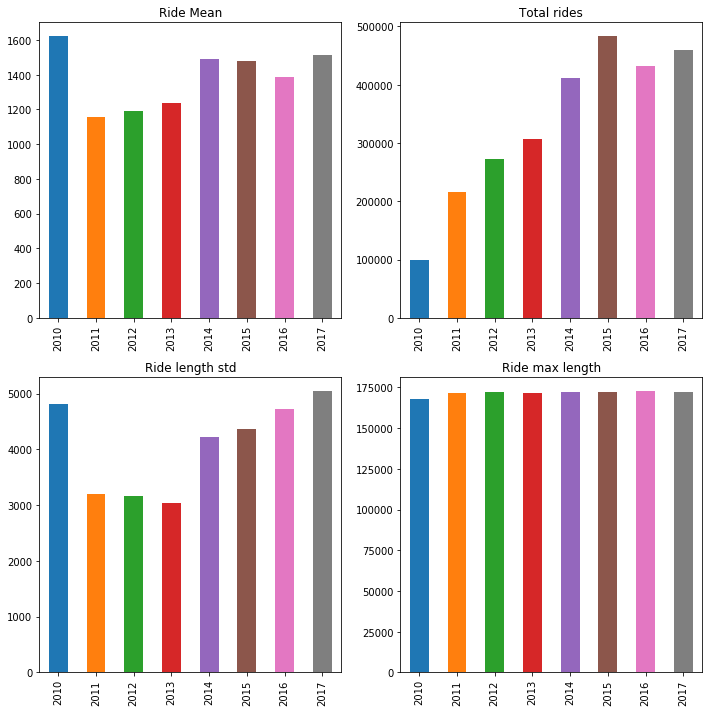

In [58]:
mcsm_graph(df_sum(nr_year))

In [7]:
for x in [2010 + x for x in range(8)] :
    print(str(x), 'Total time ridden by all users: ')
    print(dt.timedelta(seconds=sum(nr_year.loc[x].duration)))

2010 Total time ridden by all users: 
2457 days, 0:43:44
2011 Total time ridden by all users: 
2981 days, 8:45:44
2012 Total time ridden by all users: 
5494 days, 1:44:59
2013 Total time ridden by all users: 
7868 days, 0:15:12
2014 Total time ridden by all users: 
11033 days, 9:38:11
2015 Total time ridden by all users: 
9838 days, 13:47:06
2016 Total time ridden by all users: 
9333 days, 17:17:30
2017 Total time ridden by all users: 
12012 days, 19:47:41


In [8]:
for x in [2010 + x for x in range(8)] :
    print(str(x), 'Top ten ride lengths by user: ')
    print(sorted(nr_year.loc[x].duration.values)[-10:])

2010 Top ten ride lengths by user: 
[359383, 393952, 407876, 500060, 552032, 568872, 1006692, 1608263, 2655652, 39944744]
2011 Top ten ride lengths by user: 
[253539, 257561, 274077, 282971, 317716, 348415, 355459, 584322, 854874, 1007464]
2012 Top ten ride lengths by user: 
[577458, 710240, 972571, 1149171, 1582115, 1752889, 2063847, 5866947, 40358553, 84494340]
2013 Top ten ride lengths by user: 
[6044428, 7624044, 17768111, 19050276, 21605212, 27372629, 28324012, 32292835, 48552976, 54851655]
2014 Top ten ride lengths by user: 
[14239800, 15758508, 15799021, 15841339, 15994636, 16056385, 16520526, 16643299, 18154867, 25815044]
2015 Top ten ride lengths by user: 
[1899421, 2102199, 2578176, 2687672, 3484087, 3560786, 4174262, 4803749, 5307169, 6419869]
2016 Top ten ride lengths by user: 
[3645886, 4036665, 4597028, 4606363, 5021150, 5453261, 6748568, 9674947, 9962123, 16802621]
2017 Top ten ride lengths by user: 
[4178850, 4227854, 4497111, 5183609, 5201563, 6799678, 6990056, 6990559

_Assuming an eight (8) month riding window, March until October. Five (5) months with 31 days, three (3) without, for a total of 245 days in a given Niceride season. The longest ride a user could have a bike is: 21,168,000 seconds. The years 2010,2012,2013,2014 all have rides that go longer than this. The 2012 longest ride is ~978 days long, ~32.6 months, or ~2.68 years. We'll consider for (non-)member usage EDA that 2 day(s) will be out cut off point, or 172,800 seconds. The 99.5% quartile mean for all 7 years is approx. ~16,712.59. The 99.9% quartile is ~94,524. This will cover over 99.9% of all data points in our ride durations._

In [33]:
nr_year = nr_year[nr_year.duration <= 172800]

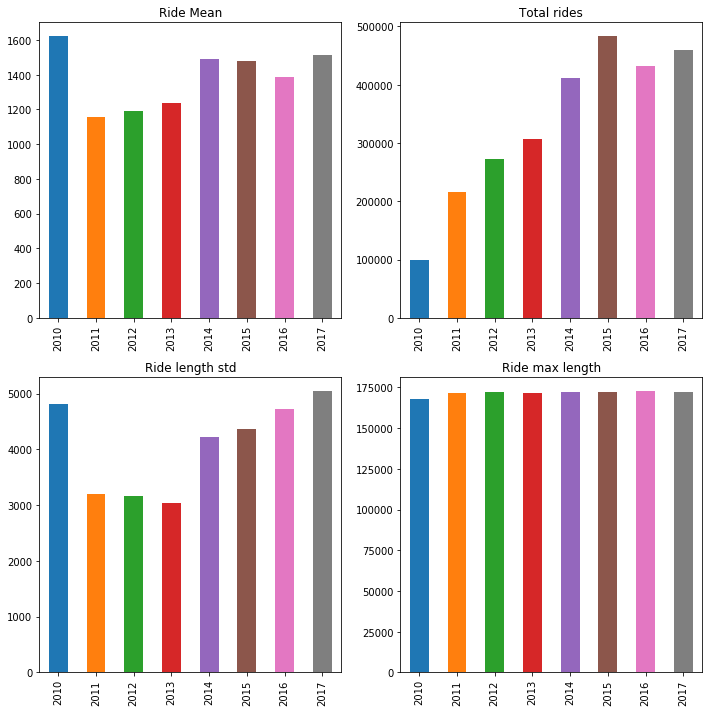

In [59]:
mcsm_graph(df_sum(nr_year))

_User ride lengths appear to be more in line year over year and stable than before_

In [36]:
for x in [2010 + x for x in range(8)] :
    print(str(x), 'Total time ridden by all users: ')
    print(dt.timedelta(seconds=sum(nr_year.loc[x].duration)),'\n')

2010 Total time ridden by all users: 
1857 days, 17:02:23 

2011 Total time ridden by all users: 
2894 days, 4:19:21 

2012 Total time ridden by all users: 
3776 days, 3:40:01 

2013 Total time ridden by all users: 
4410 days, 12:01:35 

2014 Total time ridden by all users: 
7094 days, 2:11:44 

2015 Total time ridden by all users: 
8270 days, 0:22:30 

2016 Total time ridden by all users: 
6921 days, 10:56:52 

2017 Total time ridden by all users: 
8062 days, 17:40:44 



_Total time now reflects more closely to total rides taken by year._

In [60]:
df_sum_formed(nr_year)

,2010,2011,2012,2013,2014,2015,2016,2017
count,"99,037.00","216,405.00","273,392.00","307,429.00","411,705.00","482,872.00","431,690.00","459,471.00"
mean,"1,620.67","1,155.51","1,193.38","1,239.53","1,488.76","1,479.75","1,385.29","1,516.14"
std,"4,814.70","3,204.77","3,164.28","3,042.77","4,229.46","4,371.54","4,716.09","5,046.07"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,369.00,369.00,387.00,432.00,436.00,439.00,409.00,407.00
50%,714.00,633.00,677.00,759.00,800.00,801.00,762.00,762.00
75%,"1,382.00","1,144.00","1,227.00","1,318.00","1,501.00","1,473.00","1,454.00","1,479.00"
max,"167,561.00","171,773.00","172,031.00","171,432.00","172,420.00","172,328.00","172,732.00","172,135.00"


## The members vs casual user breakdown

In [41]:
nr_year.account.value_counts()

Member    1564706
Casual    1117295
Name: account, dtype: int64

In [43]:
nr_member = nr_year[nr_year.account == 'Member']
nr_casual = nr_year[nr_year.account == 'Casual']

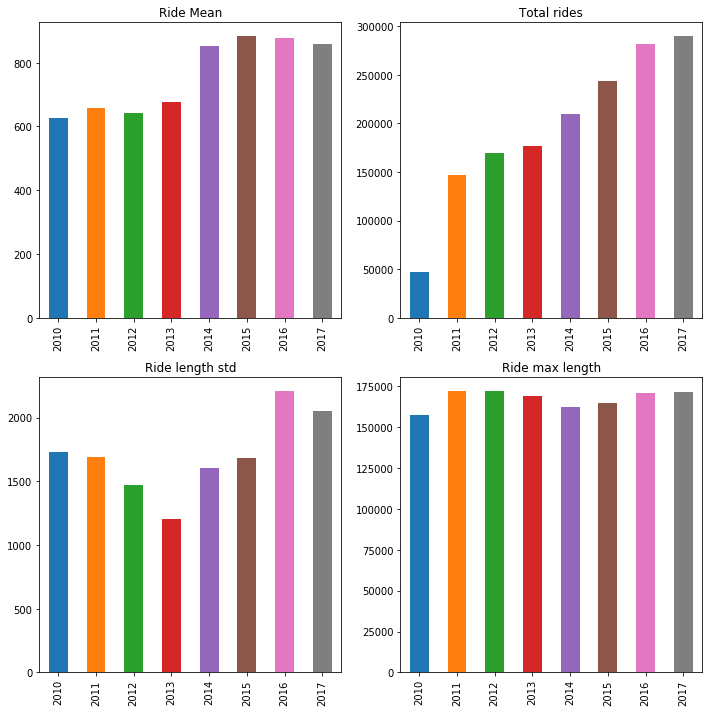

In [65]:
mcsm_graph(df_sum(nr_member))

In [61]:
df_sum_formed(nr_member)

,2010,2011,2012,2013,2014,2015,2016,2017
count,"46,666.00","147,140.00","169,101.00","176,876.00","209,770.00","243,724.00","281,937.00","289,492.00"
mean,625.86,657.77,642.68,677.84,852.05,882.27,877.04,858.00
std,"1,729.23","1,688.22","1,470.50","1,204.81","1,604.02","1,680.14","2,208.10","2,053.79"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,274.00,307.00,307.00,337.00,354.00,359.00,335.00,323.00
50%,449.00,484.00,491.00,535.00,583.00,585.00,552.00,535.00
75%,751.00,785.00,793.00,855.00,"1,031.00","1,063.00","1,014.00",974.00
max,"157,634.00","171,773.00","172,031.00","168,779.00","162,259.00","164,451.00","170,544.00","171,729.00"


In [63]:
nr_member.duration.mean()

795.025585637174

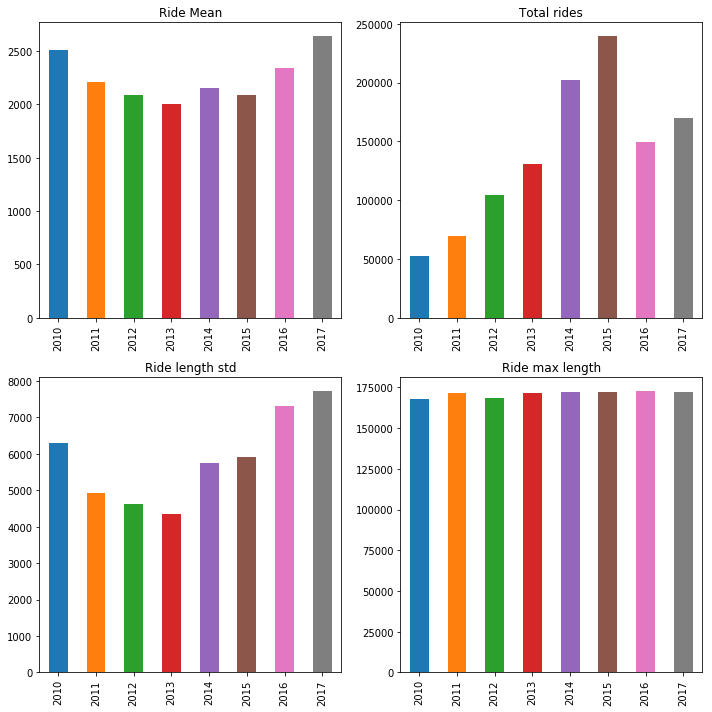

In [66]:
mcsm_graph(df_sum(nr_casual))

In [62]:
df_sum_formed(nr_casual)

,2010,2011,2012,2013,2014,2015,2016,2017
count,"52,371.00","69,265.00","104,291.00","130,553.00","201,935.00","239,148.00","149,753.00","169,979.00"
mean,"2,507.11","2,212.84","2,086.29","2,000.52","2,150.17","2,088.66","2,342.15","2,637.01"
std,"6,285.35","4,938.62","4,631.69","4,339.24","5,739.29","5,913.97","7,316.71","7,723.41"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,620.00,751.00,742.00,773.00,619.00,609.00,810.00,820.00
50%,"1,163.00","1,261.00","1,246.00","1,269.00","1,138.00","1,099.00","1,333.00","1,364.00"
75%,"2,316.00","2,165.00","2,061.50","2,053.00","2,013.00","1,855.00","2,083.00","2,173.00"
max,"167,561.00","171,620.00","168,302.00","171,432.00","172,420.00","172,328.00","172,732.00","172,135.00"


In [64]:
nr_casual.duration.mean()

2233.968652862494

_The average casual user rides for ~37.23 minutes, being charged by the half hour or unlimted 30 minute rides all day._

_The average member user rides for ~13.25 minutes, being charged for only for ride over 60 minutes. After membership fees_